# Capstone Project (Banking Domain)
                           Project Name: UK Bank Cusstomer Data Analysis
                                         Prepared by: Bishowjith Ghosh
                                              Date: September 2024
                                      Master’s Program in Data Science

# Import Libraries And Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("UK-Bank-Customers.csv")
df.head(5)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


# Steps for Dataset Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4014 non-null   int64  
 1   Name                4014 non-null   object 
 2   Surname             4014 non-null   object 
 3   Gender              4014 non-null   object 
 4   Age                 4014 non-null   int64  
 5   Region              4014 non-null   object 
 6   Job Classification  4014 non-null   object 
 7   Date Joined         4014 non-null   object 
 8   Balance             4014 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [4]:
df.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Age', 'Region',
       'Job Classification', 'Date Joined', 'Balance'],
      dtype='object')

In [5]:
df.describe()

,Customer ID,Age,Balance
count,4.014000e+03,4014.000000,4014.000000
mean,1.696831e+08,38.611111,39766.448274
std,8.865374e+07,9.819121,29859.489192
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16115.367500
50%,1.000038e+08,37.000000,33567.330000
75%,2.000031e+08,45.000000,57533.930000
max,4.000038e+08,64.000000,183467.700000


In [6]:
# Display the shape of the dataset (rows and columns)
print("\nShape of the Dataset (Rows, Columns):")
print(df.shape)


Shape of the Dataset (Rows, Columns):
(4014, 9)


# Check And Handle duplicate rows

In [7]:
print(df.duplicated().sum())

0


In [8]:
# If dupilcate Presenet, remove duplicate rows (keep the first occurrence)
# df_cleaned = df.drop_duplicates()

# Verify that duplicates are removed
# print("\nShape of Dataset After Removing Duplicates:")
## print(df_cleaned.shape)

# Check And Handle Missing/Null Values

In [9]:
print("\nNull Values in Each Column:")
print(df.isnull().sum())


Null Values in Each Column:
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64


In [10]:
# IF missing value is present, handling Categorical Columns (e.g., 'Job Classification', 'Region')

# 1. Fill missing values in categorical columns with 'Unknown'

# df['Job Classification'].fillna('Unknown', inplace=True)
# df['Region'].fillna('Unknown', inplace=True)

# Alternatively, fill with the most frequent value (mode)
# df['Job Classification'].fillna(df['Job Classification'].mode()[0], inplace=True)

# 2 Handling Numerical Columns (e.g., 'Age', 'Balance')

# Fill missing values in numerical columns with the median

# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Balance'].fillna(df['Balance'].median(), inplace=True)

# Alternatively, fill with the mean
# df['Age'].fillna(df['Age'].mean(), inplace=True)

# 2.3 Handling Date Columns (e.g., 'Date Joined')
# Option 1: Fill missing dates with a placeholder (e.g., today's date)
# df['Date Joined'].fillna(pd.Timestamp.today(), inplace=True)

# Option 2: Drop rows with missing dates if necessary
# df.dropna(subset=['Date Joined'], inplace=True)

# Step 3: Verify That Missing Values Are Handled
# print("\nMissing Values After Handling:")
# print(df.isnull().sum())

# Check Unique Values

In [11]:
print("\nUnique Values in Categorical Columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
Name: 172 unique values
Surname: 150 unique values
Gender: 2 unique values
Region: 4 unique values
Job Classification: 3 unique values
Date Joined: 307 unique values


# Checking And Fixing Data Types

In [12]:
print("\nData Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
dtype: object


In [13]:
df[['Date Joined']].head()

,Date Joined
0,05.Jan.15
1,06.Jan.15
2,07.Jan.15
3,08.Jan.15
4,09.Jan.15


In [14]:
# Convert 'Date Joined' column to datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'], format='%d.%b.%y', errors='coerce')

# Check if the conversion worked
print("\nData Types After Conversion:")
print(df.dtypes)

# Display first few rows to verify 'Date Joined' conversion
print("\nFirst 5 rows with 'Date Joined' column:")
print(df[['Date Joined']].head())


Data Types After Conversion:
Customer ID                    int64
Name                          object
Surname                       object
Gender                        object
Age                            int64
Region                        object
Job Classification            object
Date Joined           datetime64[ns]
Balance                      float64
dtype: object

First 5 rows with 'Date Joined' column:
  Date Joined
0  2015-01-05
1  2015-01-06
2  2015-01-07
3  2015-01-08
4  2015-01-09


# Outlier Detection and Handling

In [15]:
# Detecting outliers using IQR for 'Age' and 'Balance'

# Define a function to calculate and detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nOutliers for {column}:")
    print(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

# Detect outliers in 'Age'
detect_outliers(df, 'Age')

# Detect outliers in 'Balance'
detect_outliers(df, 'Balance')


Outliers for Age:
Empty DataFrame
Columns: [Customer ID, Name, Surname, Gender, Age, Region, Job Classification, Date Joined, Balance]
Index: []

Outliers for Balance:
      Customer ID       Name  Surname  Gender  Age    Region  \
5       300000006        Ava  Coleman  Female   30     Wales   
119     100000120     Andrea  Dickens  Female   31   England   
302     100000303      Brian  Russell    Male   42   England   
403     100000404    Stewart     Bell    Male   38   England   
462     200000463       Paul     Reid    Male   46  Scotland   
...           ...        ...      ...     ...  ...       ...   
3731    100003732      Faith     Ince  Female   34   England   
3785    100003786      Gavin     Hart    Male   35   England   
3831    100003832  Sebastian   Arnold    Male   44   England   
3959    100003960    Michael    Poole    Male   33   England   
3990    100003991        Sue  Cornish  Female   30   England   

     Job Classification Date Joined    Balance  
5           B

In [16]:
df.shape

(4014, 9)

In [17]:
 # Remove Outliers
    
# Calculate IQR for 'Balance'
Q1_balance = df['Balance'].quantile(0.25)
Q3_balance = df['Balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance

# Define the bounds for outliers
lower_bound_balance = Q1_balance - 1.5 * IQR_balance
upper_bound_balance = Q3_balance + 1.5 * IQR_balance

# Remove outliers from 'Balance' column
df_clean = df[(df['Balance'] >= lower_bound_balance) & (df['Balance'] <= upper_bound_balance)]

# Display the shape of the dataset after removing outliers
print("\nShape of the dataset after removing outliers in 'Balance':")
print(df_clean.shape)


Shape of the dataset after removing outliers in 'Balance':
(3947, 9)


In [18]:
# Option 2: Cap the Outliers : This will replace extreme values with a threshold (either the 1st percentile or 99th percentile)

# Cap the outliers for 'Balance'
# lower_cap = df['Balance'].quantile(0.01)  # 1st percentile
# upper_cap = df['Balance'].quantile(0.99)  # 99th percentile

# Apply capping
# df['Balance'] = df['Balance'].apply(lambda x: lower_cap if x < lower_cap else (upper_cap if x > upper_cap else x))

# Verify the changes
# print("\nShape of the dataset after capping outliers in 'Balance':")
# print(df.shape)

# Feature Engineering

In [19]:
#  Calculating Customer Tenure
from datetime import datetime

# Calculate the tenure of the customer in years
df['Term(Years)'] = (datetime.now() - df['Date Joined']).dt.days / 365

# Display the first few rows to verify
print("\nFirst 5 rows with 'Customer (Years)':")
df[['Customer ID', 'Date Joined', 'Term(Years)']].head()


First 5 rows with 'Customer (Years)':


,Customer ID,Date Joined,Term(Years)
0,100000001,2015-01-05,9.715068
1,400000002,2015-01-06,9.712329
2,100000003,2015-01-07,9.709589
3,300000004,2015-01-08,9.706849
4,100000005,2015-01-09,9.704110


In [20]:
# Annual Average Balance:
# Calculate the annual average balance by dividing the balance by the number of years (Term)
df['Annual Average Balance'] = df['Balance'] / df['Term(Years)']

# Display the first few rows to verify
print("\nFirst 5 rows with 'Annual Average Balance':")
df[['Customer ID', 'Balance', 'Annual Average Balance']].head()


First 5 rows with 'Annual Average Balance':


,Customer ID,Balance,Annual Average Balance
0,100000001,113810.15,11714.806754
1,400000002,36919.73,3801.326220
2,100000003,101536.83,10457.376679
3,300000004,1421.52,146.445047
4,100000005,35639.79,3672.649167


# Grouping and Aggregation 


Let's group the customers by their Job Classification and analyze the average balance, average tenure, and other statistics.

In [21]:
# Group by 'Job Classification' and calculate the mean balance and Term
job_grouped = df.groupby('Job Classification').agg(
    Avg_Balance=('Balance', 'mean'),
    Avg_Term=('Term(Years)', 'mean'),
    Count=('Customer ID', 'count')
)

# Display the summary statistics
print("\nSummary Statistics by Job Classification:")
job_grouped


Summary Statistics by Job Classification:


,Avg_Balance,Avg_Term,Count
Job Classification,,,
Blue Collar,39403.294090,9.074981,1049
Other,39824.341416,9.072022,1010
White Collar,39931.397974,9.068169,1955


In [22]:
# Grouping by Region and Analyzing Balance
# Group by 'Region' and calculate the mean balance and tenure
region_grouped = df.groupby('Region').agg(
    Avg_Balance=('Balance', 'mean'),
    Avg_Term=('Term(Years)', 'mean'),
    Count=('Customer ID', 'count')
)

# Display the summary statistics
print("\nSummary Statistics by Region:")
region_grouped


Summary Statistics by Region:


,Avg_Balance,Avg_Term,Count
Region,,,
England,39292.911996,9.060938,2159
Northern Ireland,39505.053981,9.161397,211
Scotland,39511.326263,9.064532,1124
Wales,42390.056269,9.089452,520


# Visualizing Data

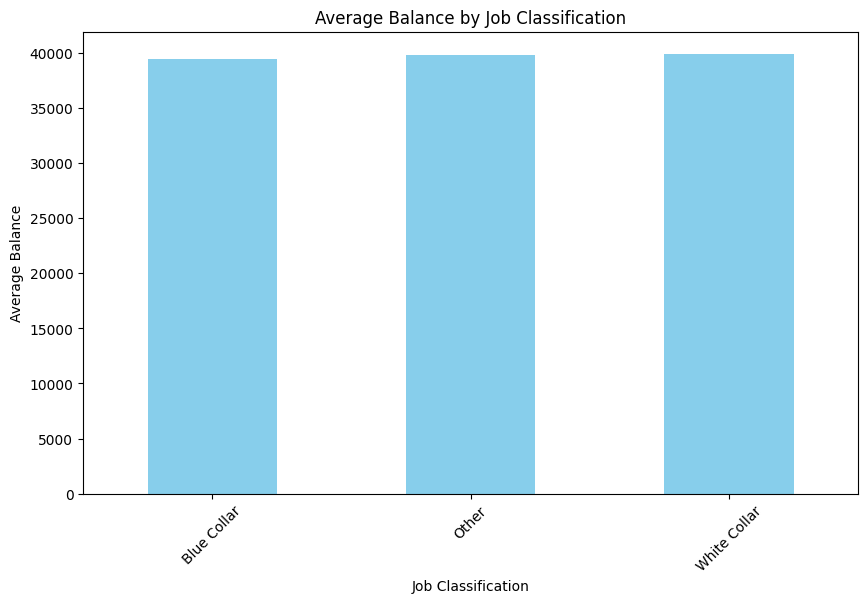

In [23]:
# Bar plot for average balance by Job Classification
job_grouped['Avg_Balance'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Balance by Job Classification')
plt.ylabel('Average Balance')
plt.xlabel('Job Classification')
plt.xticks(rotation=45)
plt.show()

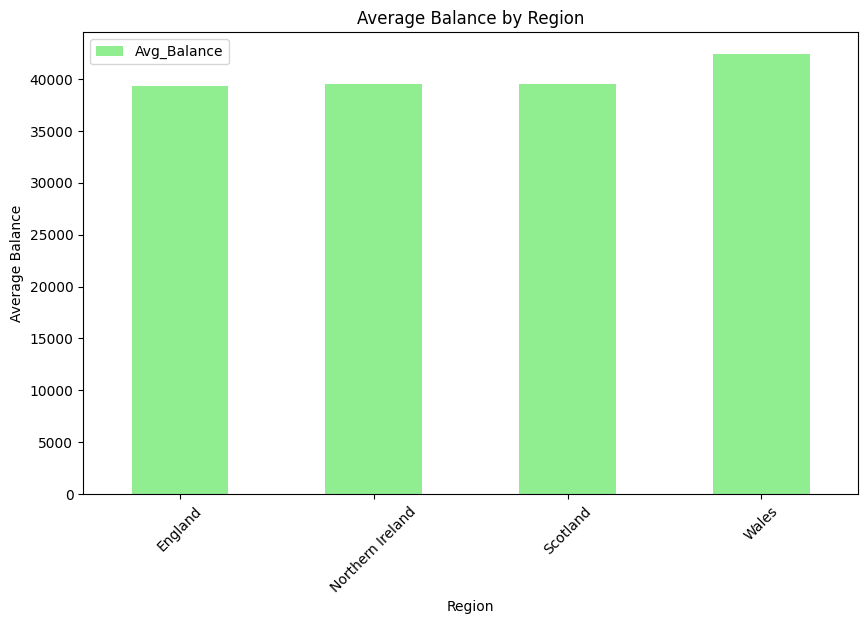

In [24]:
# Group data by region
region_grouped = df.groupby('Region').agg(Avg_Balance=('Balance', 'mean'))

# Plot average balance by region
region_grouped.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Average Balance by Region')
plt.ylabel('Average Balance')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

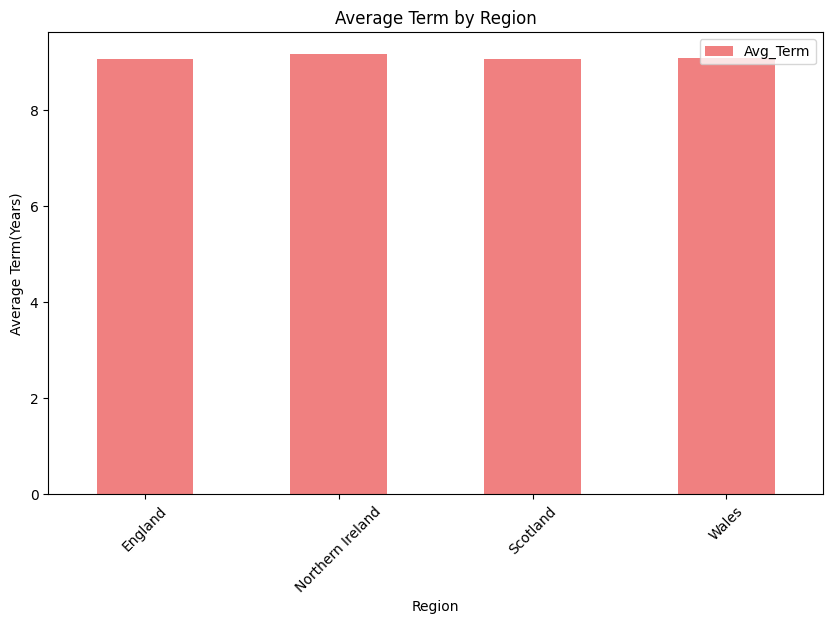

In [25]:
# Distribution of Balance
# Group by region and calculate average Term
region_Term_grouped = df.groupby('Region').agg(Avg_Term=('Term(Years)', 'mean'))

# Plot average tenure by region
region_Term_grouped.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Average Term by Region')
plt.ylabel('Average Term(Years)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


In [26]:
# Create the 'Age Group' column based on age conditions using vectorized operations
df['Age Group'] = 'Senior'  # Default to 'Senior' for ages 60 and above

# Assign the age groups based on conditions
df.loc[df['Age'] < 25, 'Age Group'] = 'Young'
df.loc[(df['Age'] >= 25) & (df['Age'] < 35), 'Age Group'] = 'Early Career'
df.loc[(df['Age'] >= 35) & (df['Age'] < 45), 'Age Group'] = 'Mid Career'
df.loc[(df['Age'] >= 45) & (df['Age'] < 60), 'Age Group'] = 'Experienced'

# Display the first few rows to verify the age group assignment
print(df[['Customer ID', 'Age', 'Age Group']].head())


   Customer ID  Age     Age Group
0    100000001   21         Young
1    400000002   34  Early Career
2    100000003   46   Experienced
3    300000004   32  Early Career
4    100000005   38    Mid Career


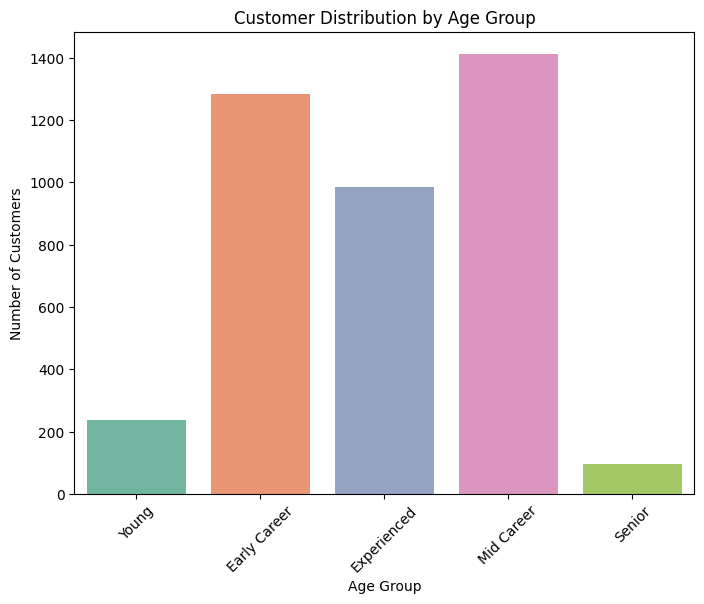

In [27]:
# Simple bar plot to show the number of customers in each Age Group
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=df, palette='Set2')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Calculate the 25th, 50th (median), and 75th percentiles of customer balances
balance_25th = np.percentile(df['Balance'], 25)
balance_median = np.percentile(df['Balance'], 50)
balance_75th = np.percentile(df['Balance'], 75)

# Display the results
print("25th Percentile Balance:", balance_25th)
print("Median Balance:", balance_median)
print("75th Percentile Balance:", balance_75th)

25th Percentile Balance: 16115.3675
Median Balance: 33567.33
75th Percentile Balance: 57533.93


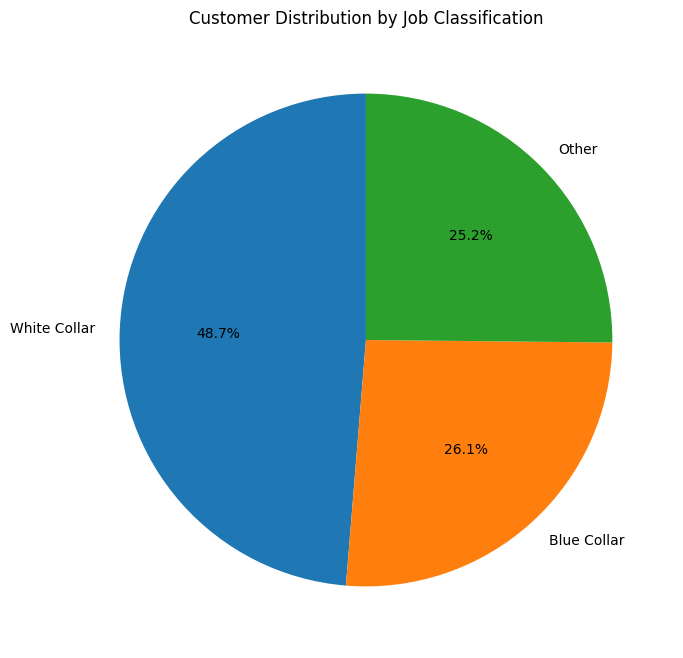

In [29]:
# Customer Count by Job Classification
# Group by Job Classification and calculate count
job_grouped = df['Job Classification'].value_counts()

# Plot pie chart of job classification
job_grouped.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Customer Distribution by Job Classification')
plt.ylabel('')  # Hide the y-label for a cleaner pie chart
plt.show()

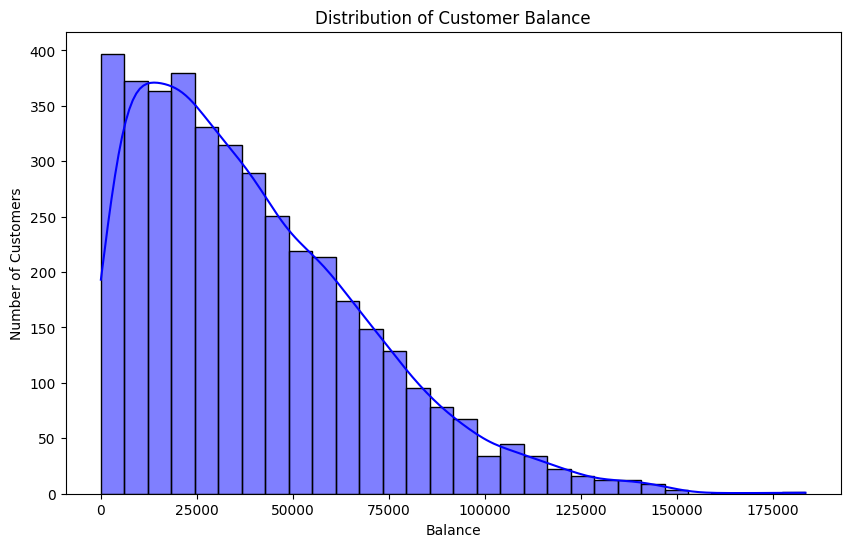

In [30]:
# Distribution of Balance
# Plot the distribution of Balance
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], bins=30, kde=True, color='blue')
plt.title('Distribution of Customer Balance')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.show()

In [33]:
# Export file
df.to_csv('Cleaned_UK_Bank_Customer-Analysis.csv', index=False)
print("Export successful")

Export successful
